In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
data,target = make_blobs(1000,centers=3,cluster_std=1.9,random_state=10)

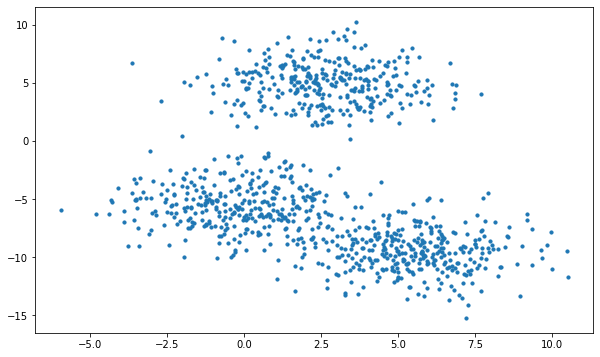

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(data[:,0],data[:,1],s=10)
plt.show()

In [6]:
def euclideanDist(a,b,ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [8]:
k = 3
C_x = np.random.randint(0, np.max(data) - 5, size=k)
C_y = np.random.randint(0, np.max(data) - 5, size=k)

In [9]:
C_x,C_y

(array([1, 3, 1]), array([4, 0, 1]))

In [11]:
centroids = np.array(list(zip(C_x,C_y)), dtype=np.float32)

In [12]:
centroids

array([[1., 4.],
       [3., 0.],
       [1., 1.]], dtype=float32)

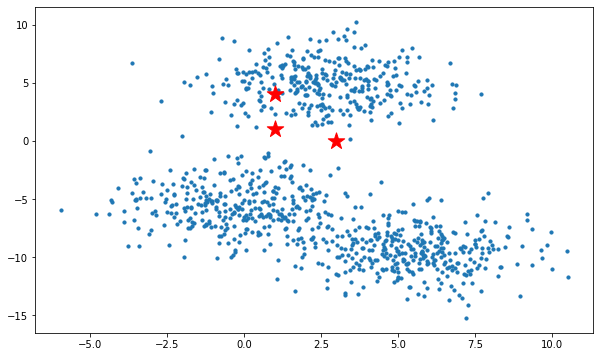

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(data[:,0],data[:,1],s=10)
plt.scatter(C_x,C_y,marker='*',s=300,c='red')
plt.show()

In [14]:
C_old = np.zeros_like(centroids)

In [15]:
C_old

array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)

In [16]:
clusters = np.zeros(len(data))

In [18]:
clusters[:5]

array([0., 0., 0., 0., 0.])

In [19]:
def plotData(points,clusters,centroids):
    colors = ['r','g','b']
    fig, ax = plt.subplots()
    plt.figure(figsize=(10,6))
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        ax.scatter(points[:,0],points[:,1],s=7,c=colors[i])
    ax.scatter(centroids[:,0],centroids[:,1],marker='*',s=200,c='m')
    plt.show()

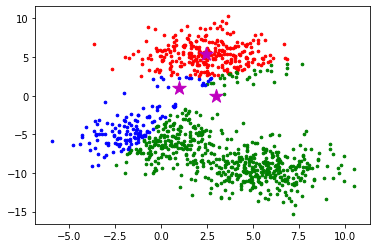

<Figure size 720x432 with 0 Axes>

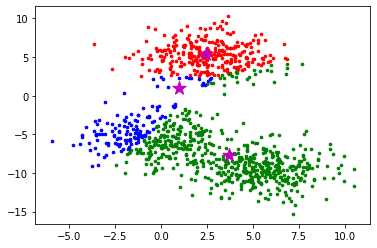

<Figure size 720x432 with 0 Axes>

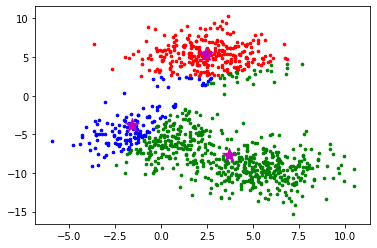

<Figure size 720x432 with 0 Axes>

9.633951


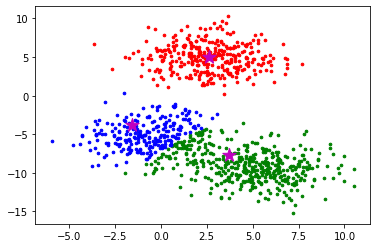

<Figure size 720x432 with 0 Axes>

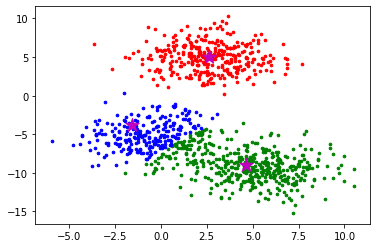

<Figure size 720x432 with 0 Axes>

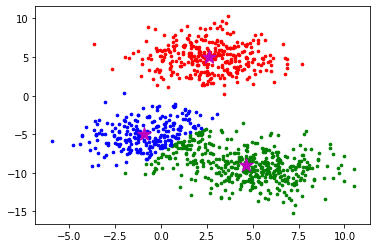

<Figure size 720x432 with 0 Axes>

2.0935261


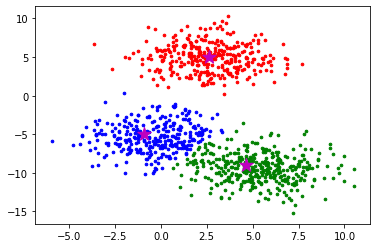

<Figure size 720x432 with 0 Axes>

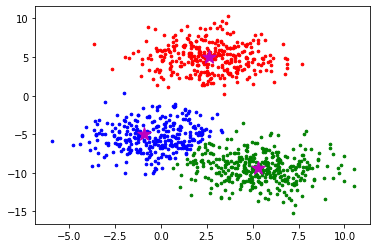

<Figure size 720x432 with 0 Axes>

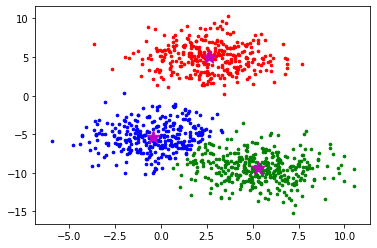

<Figure size 720x432 with 0 Axes>

1.0111451


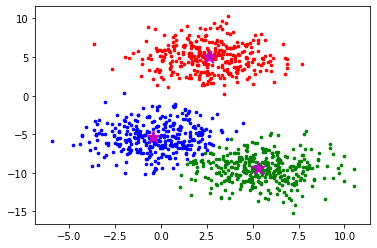

<Figure size 720x432 with 0 Axes>

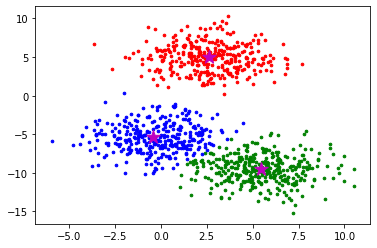

<Figure size 720x432 with 0 Axes>

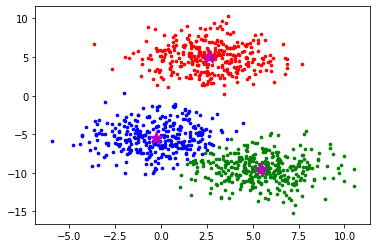

<Figure size 720x432 with 0 Axes>

0.25444117


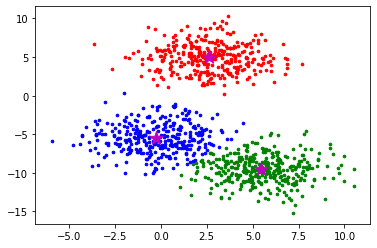

<Figure size 720x432 with 0 Axes>

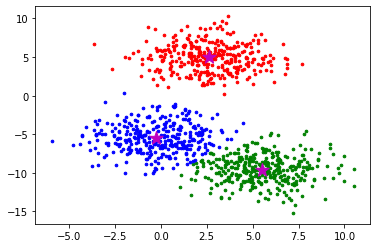

<Figure size 720x432 with 0 Axes>

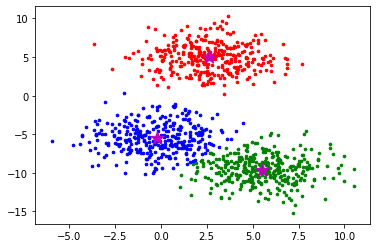

<Figure size 720x432 with 0 Axes>

0.104812704


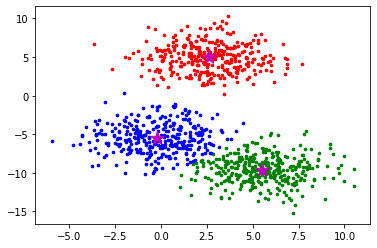

<Figure size 720x432 with 0 Axes>

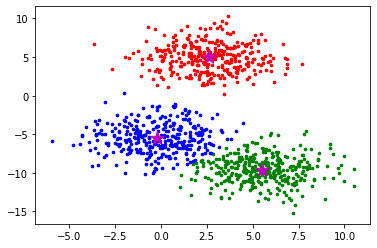

<Figure size 720x432 with 0 Axes>

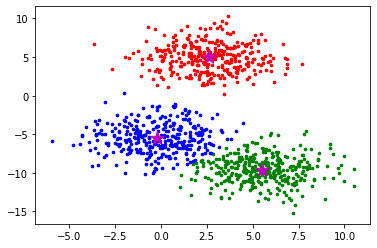

<Figure size 720x432 with 0 Axes>

0.02983773


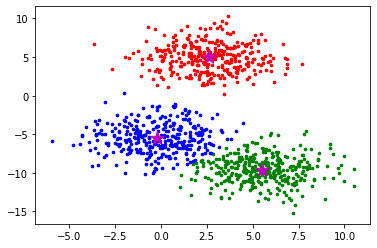

<Figure size 720x432 with 0 Axes>

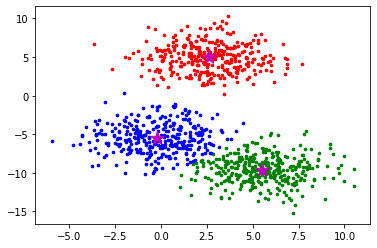

<Figure size 720x432 with 0 Axes>

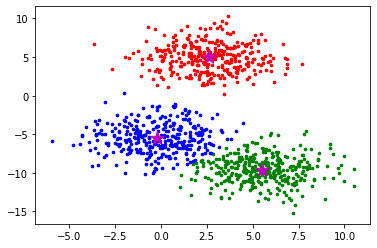

<Figure size 720x432 with 0 Axes>

0.0


In [20]:
error = euclideanDist(centroids,C_old,None)
while error != 0:
    for i in range(len(data)):
        distance = euclideanDist(data[i],centroids)
        cluster = np.argmin(distance)
        clusters[i] = cluster
    C_old = deepcopy(centroids)
    for i in range(k):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        centroids[i] = np.mean(points,axis=0)
        plotData(points,clusters,centroids)
    error = euclideanDist(centroids,C_old,None)
    print(error)